# App User Segmentation

Using K-means clustering

In [1]:
#imports
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import pandas as pd
pio.templates.default = "plotly_white"
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
#Have kaleido installed to view plotly charts as static images

#load data
data = pd.read_csv("userbehaviour.csv")
data.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed


In [2]:
#pip install -U kaleido

In [3]:
#check the highest, lowest and average screen time meausres of all users
print(f'Average Screen Time = {data["Average Screen Time"].mean()}')
print(f'Highest Screen Time = {data["Average Screen Time"].max()}')
print(f'Lowest Screen Time = {data["Average Screen Time"].min()}')

Average Screen Time = 24.39039039039039
Highest Screen Time = 50.0
Lowest Screen Time = 0.0


In [4]:
#highest, lowest and average spending of all users
print(f'Average Spend of the Users = {data["Average Spent on App (INR)"].mean()}')
print(f'Highest Spend of the Users = {data["Average Spent on App (INR)"].max()}')
print(f'Lowest Spend of the Users = {data["Average Spent on App (INR)"].min()}')

Average Spend of the Users = 424.4154154154154
Highest Spend of the Users = 998.0
Lowest Spend of the Users = 0.0


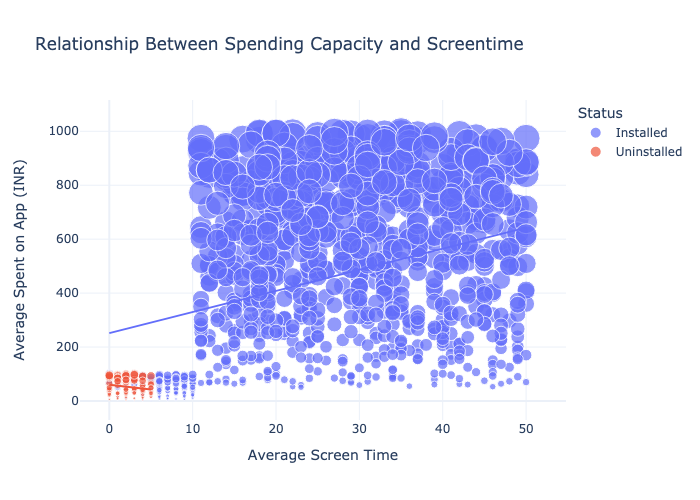

In [7]:
#relationship between spending and screen time
figure = px.scatter(data_frame = data, 
                    x="Average Screen Time",
                    y="Average Spent on App (INR)", 
                    size="Average Spent on App (INR)", 
                    color= "Status",
                    title = "Relationship Between Spending Capacity and Screentime",
                    trendline="ols")
#To see plotly visual as an interactive visual, "figure.show()" png added to create a static web-viewer friendly image
figure.show('png')

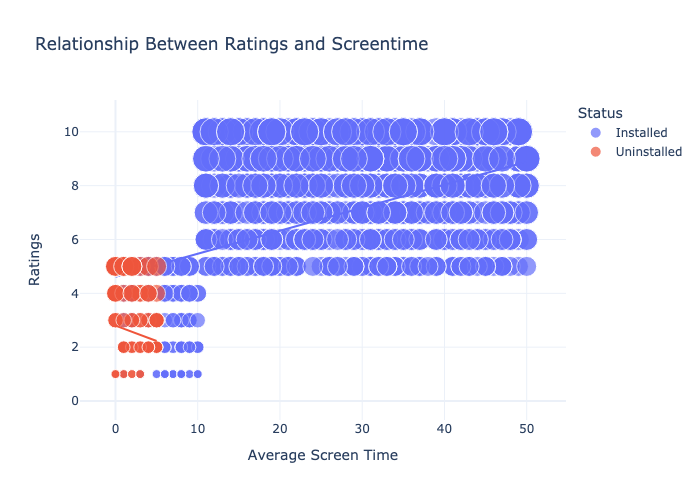

In [6]:
#relationship between ratings and screentime
figure = px.scatter(data_frame = data, 
                    x="Average Screen Time",
                    y="Ratings", 
                    size="Ratings", 
                    color= "Status", 
                    title = "Relationship Between Ratings and Screentime",
                    trendline="ols")
figure.show('png')

In [8]:
#App user segmentation using K-means clustering

#set up clusters
clustering_data = data[["Average Screen Time", "Left Review", 
                        "Ratings", "Last Visited Minutes", 
                        "Average Spent on App (INR)", 
                        "New Password Request"]]

#scale data using minmax scaler
for i in clustering_data.columns:
    MinMaxScaler(i)
    
#use k-means algorithm
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(clustering_data)
data["Segments"] = clusters

#view cluster assignments
data.head(10)

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Segments
0,1001,17.0,634.0,1,9,7,2990,Installed,0
1,1002,0.0,54.0,0,4,8,24008,Uninstalled,2
2,1003,37.0,207.0,0,8,5,971,Installed,0
3,1004,32.0,445.0,1,6,2,799,Installed,0
4,1005,45.0,427.0,1,5,6,3668,Installed,0
5,1006,28.0,599.0,0,9,4,2878,Installed,0
6,1007,49.0,887.0,1,9,6,4481,Installed,0
7,1008,8.0,31.0,0,2,1,1715,Installed,0
8,1009,28.0,741.0,1,8,2,801,Installed,0
9,1010,28.0,524.0,1,8,4,4621,Installed,0


In [9]:
#how many users are in each segment?
data['Segments'].value_counts()

0    910
1     45
2     44
Name: Segments, dtype: int64

In [10]:
#rename the segments
data["Segments"] = data["Segments"].map({0: "Retained", 1: 
    "Churn", 2: "Needs Attention"})

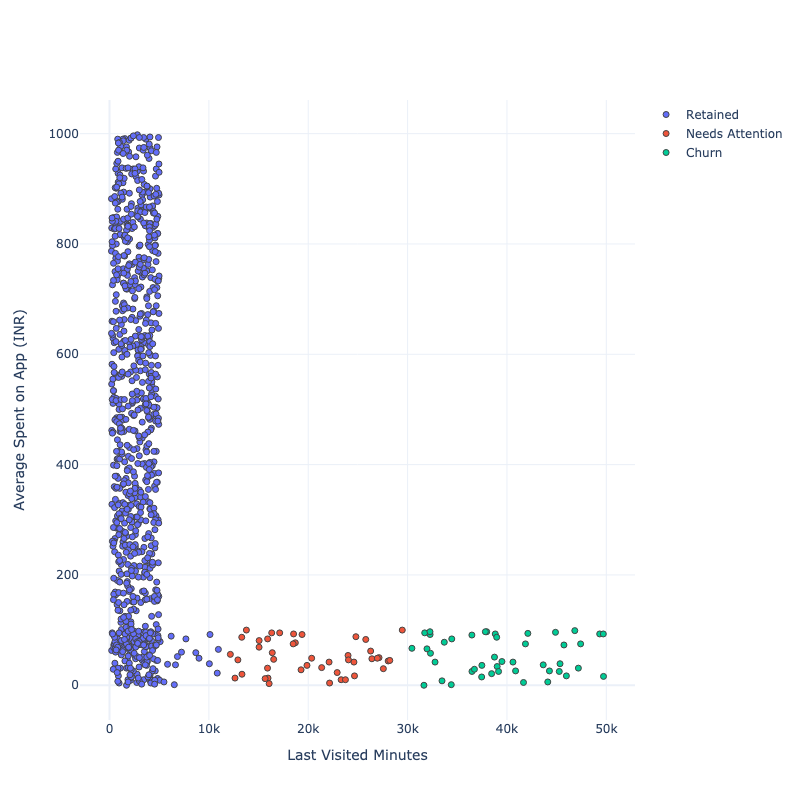

In [12]:
#visualize segments
PLOT = go.Figure()
for i in list(data["Segments"].unique()):
    

    PLOT.add_trace(go.Scatter(x = data[data["Segments"]== i]['Last Visited Minutes'],
                                y = data[data["Segments"] == i]['Average Spent on App (INR)'],
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='Last Visited Minutes: %{x} <br>Average Spent on App (INR): %{y}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   yaxis_title = 'Average Spent on App (INR)',
                   xaxis_title = 'Last Visited Minutes',
                   scene = dict(xaxis=dict(title = 'Last Visited Minutes', titlefont_color = 'black'),
                                yaxis=dict(title = 'Average Spent on App (INR)', titlefont_color = 'black')))

PLOT.show('png')